<a href="https://colab.research.google.com/github/JangAyeon/python_machine_learning/blob/main/%5B2_4%5DModel_Selection_%EB%AA%A8%EB%93%88_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.4 Model Selection 소개

**학습/테스트 데이터 셋 분리 - train_test_split()**

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data,train_label)

#train dataset으로 train 진행
pred=dt_clf.predict(train_data) #별도의test data 사용 x , 그냥 train data로 예측까지 한거임
print('예측 정확도: ',accuracy_score(train_label,pred))

#예측 정확도:  1.0 
# -> train data set으로 performance evaluation까지 진행해서 정확도 100%

예측 정확도:  1.0




```
# X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)
```


*   test_size : 전체 데이터에서 test data 크기를 얼마로 sampling하는가<br>-> default:0.25로 25%
*   train_size : 전체 data에서 train data 크기를 얼마로 sampling 할 것 인가<br>-> test_size인자 사용해서 train_size는 별로 사용 x
*   shuffle : 분리 전 섞을 것인가<br>-> default : True
*   random_state : seed number





In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier()
iris_data=load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)

In [15]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


Ndarray 뿐만 아니라 DataFrame/Series도 train_test_split()으로 분할 가능

In [16]:
import pandas as pd

iris_df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df['target']=iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
ftr_df=iris_df.iloc[:,:-1] #맨 마지막꺼는 빼고
tgt_df=iris_df.iloc[:,-1]

X_trian,X_test,y_train,y_test=train_test_split(ftr_df,tgt_df,test_size=0.3,random_state=121)

In [18]:
print(type(X_train),type(X_test),type(y_train),type(y_test))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [19]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


**교차 검증**<br>


*   train data -> train data & 학습된 모델의 성능을 우선 평가하는 validation data
*   test data -> train이 완료된 후 최종적으로 평가를 위한 data <br> <br>

**K-Fold Validation**

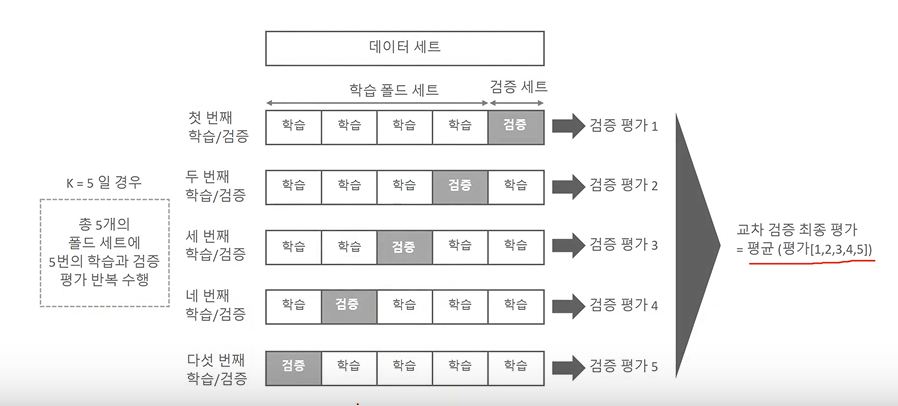

**Stratified K Fold**<br>
불균형한 분포도를 가진 label data를 위한 K-Fold 방식




1.   K-Fold




In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features=iris.data #iris의 feature 값을 가져옴
label=iris.target
df_clf=DecisionTreeClassifier(random_state=156)

kfold=KFold(n_splits=5) #5개로 폴드 나눔
cv_accuracy=[] #5개 폴드별 정확도를 남을 리스트
print("붓꽃 데이터 세트 크기 : ",features.shape[0])

붓꽃 데이터 세트 크기 :  150


In [25]:
n_iter=0

for train_index,test_index in kfold.split(features): 
  #kfold.split이용해서 폴드별 train과 validation의 row index를 array로 반환
  X_train,X_test=features[train_index],features[test_index]
  #반환된 인덱스로 train과 validation의 data 추출
  y_train,y_test=label[train_index],label[test_index]


  #train과 prediction
  df_clf.fit(X_train,y_train)
  pred=df_clf.predict(X_test)
  n_iter+=1

  #반복 마다 정확도 측정 -> accuracy_score 이용
  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_size=X_train.shape[0]
  test_size=X_test.shape[0]
  print("\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기: {3}"
  .format(n_iter,accuracy,train_size,test_size))

  print("#{0} 검증 세트 인덱스 : {1}".format(n_iter,test_index))
  cv_accuracy.append(accuracy) #정확도를 리스트에 하나씩 추가

print("\n##평균 검증 정확도: ",np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도:  0.9




2.   Stratified K Fold



In [28]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [29]:
kfold=KFold(n_splits=3) # -> 폴드 세트 3번 돌면서 달라지는 train/validation의 row index 반환

n_iter=0
for train_index, test_index in kfold.split(iris_df):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print('## 교차 검증 : {0}'.format(n_iter))
  print("학습 레이블 데이터 분포 : \n", label_train.value_counts())
  print("검증 레이블 데이터 분포 : \n", label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


In [33]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=3)
n_iter=0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
  n_iter+=1
  label_train=iris_df['label'].iloc[train_index]
  label_test=iris_df['label'].iloc[test_index]
  print("## 교차 검증: {0}".format(n_iter))
  print("학습 레이블 데이터 분포",label_train.value_counts())
  print("검증 레이블 데이터 분호",label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분호 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분호 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분호 2    17
1    17
0    16
Name: label, dtype: int64


In [37]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index  in skfold.split(features, label): #label의 data set도 잊지 말고 추가 
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  dt_clf.fit(X_train , y_train)    
  pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
    
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667




*   cross_val_score()<br>
 -> 폴드 설정 / 반복문 돌면서 train/validation 추출,학습,예측 / 폴드별 예측 성능 평균화해 최종 평가





In [38]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


**GridSearchCV**<br>
-> hyper parameter를 차례로 입력하면서 최적의parameter 도출<br>
-> parameter 순차 적용 횟수 X cv 세트 수 = train/validation 총 수행 횟수



In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#data가져오고 train과 test data 나누기
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]} 
#딕셔너리 형태로 하이퍼 파라미터 이름을 지정하고 거기에 따라서 각각의 순차적으로 수행해야할 하이퍼 파라미터 값들을 넣어줌

In [41]:

import pandas as pd

#param_grid가 하이퍼 파라미터 3개의 train,test set fold로 나눠 test 수행
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)
#refit=True가 default -> 가장 좋은 parameter 설정으로 재학습 진행

#train data로 param_gird의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
#gridsearchCV 결과는 cv_results_ 딕셔너리로 저장됨

scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
#딕셔너리를 dataframe으로 변환하여 출력

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [42]:
grid_dtree.cv_results_ #이런 parameter가 있다고 보여줌

{'mean_fit_time': array([0.0009129 , 0.00041644, 0.00041707, 0.00033434, 0.00035938,
        0.00033792]),
 'mean_score_time': array([0.0006326 , 0.00031249, 0.00026298, 0.00022904, 0.00023564,
        0.0002269 ]),
 'mean_test_score': array([0.7       , 0.7       , 0.95833333, 0.95833333, 0.975     ,
        0.975     ]),
 'mean_train_score': array([0.7       , 0.7       , 0.95833333, 0.95833333, 0.97916667,
        0.97916667]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_s

In [43]:

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) #best_params_ : 최적의 parameter
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_)) #최적의 parameter가 적용된 상태로 정확도 구하기
# refit=True로 설정된 GridSearchCV 객체

pred = grid_dtree.predict(X_test)
#fit()을 수행 시 학습이 완료된 Estimator를 가지므로 predict()를 통해 예측도 가능.
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


In [46]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
